In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def get_encoder():
    model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
    return model

In [ ]:
def preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = (img / 127.5) - 1
    return img

In [ ]:
def get_feature_vector(model, img):
    img_batch = np.expand_dims(img, axis=0)
    features = model.predict(img_batch, verbose=0)
    return features.flatten()

In [ ]:
def build_feature_database(model, folder_path):
    features = []
    image_paths = []

    for filename in os.listdir(folder_path):
            full_path = os.path.join(folder_path, filename)
            img = preprocess_image(full_path)
            vector = get_feature_vector(model, img)
            features.append(vector)
            image_paths.append(full_path)

    return np.array(features), image_paths

In [ ]:
def find_similar_images(query_vector, feature_db, image_paths, top_k):
    similarities = cosine_similarity([query_vector], feature_db)[0]
    top_k_indices = similarities.argsort()[-top_k:][::-1]
    return [image_paths[i] for i in top_k_indices]

In [ ]:
encoder = get_encoder()
dataset_folder = '/content/pisss'
feature_db, image_paths = build_feature_database(encoder, dataset_folder)


<ipython-input-9-9dd9699c4b07>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Original image: 



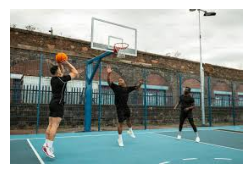


 Similar image: 



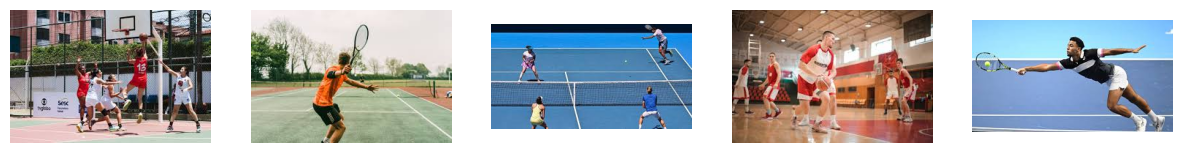

In [ ]:
def show_images(image_list):
    plt.figure(figsize=(15, 5))
    for i in range(len(image_list)):
        img = cv2.imread(image_list[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(image_list), i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

query_image_path = '/content/images (3).jpg'
query_img = preprocess_image(query_image_path)
query_vector = get_feature_vector(encoder, query_img)

print("Original image: \n")
plt.figure(figsize=(3, 3))
img = cv2.imread(query_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

print("\n Similar image: \n")
similar_images = find_similar_images(query_vector, feature_db, image_paths, top_k=5)
show_images(similar_images)
